In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [2]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [3]:
import io
df = pd.read_csv("BTC-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
...,...,...,...,...,...,...
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910
2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456


Text(0, 0.5, 'BTC-USD Açılış Fiyatları')

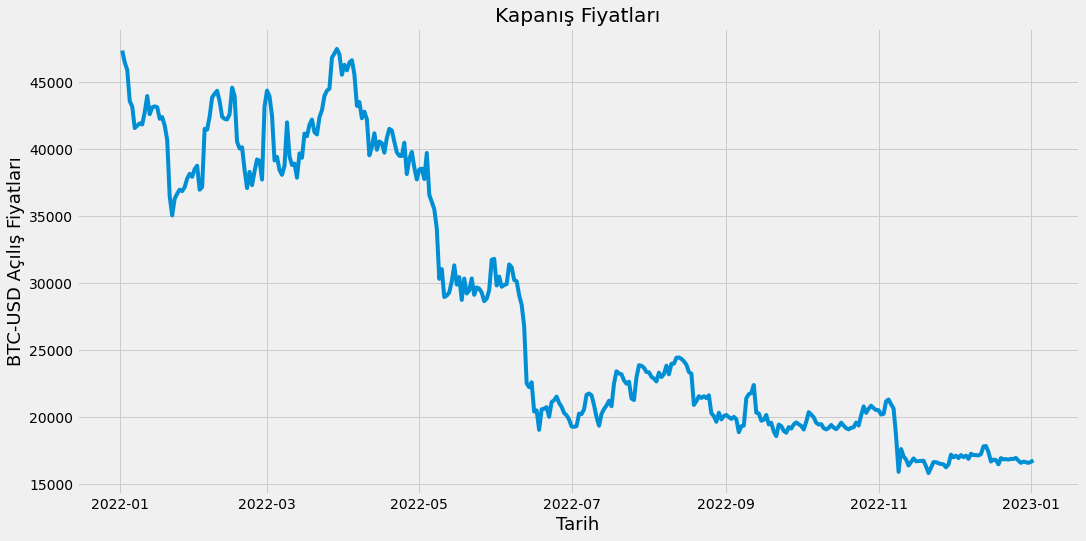

In [4]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('BTC-USD Açılış Fiyatları', fontsize=18)


In [5]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

293

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.99619578],
       [0.96819247],
       [0.95049769],
       [0.87699123],
       [0.86410947],
       [0.81350638],
       [0.81906344],
       [0.82467168],
       [0.8218199 ],
       [0.85069107],
       [0.88898986],
       [0.84613639],
       [0.8621766 ],
       [0.86462934],
       [0.86262421],
       [0.83537136],
       [0.83931985],
       [0.81939132],
       [0.78580665],
       [0.65249514],
       [0.60744664],
       [0.64679689],
       [0.65871425],
       [0.66817418],
       [0.66495802],
       [0.67398982],
       [0.69438531],
       [0.70555529],
       [0.69859226],
       [0.71644425],
       [0.72465641],
       [0.66814199],
       [0.67450648],
       [0.81170619],
       [0.80982128],
       [0.84048154],
       [0.88555483],
       [0.89433556],
       [0.90129145],
       [0.87686842],
       [0.84033961],
       [0.83517936],
       [0.83369718],
       [0.84598953],
       [0.90875413],
       [0.88939258],
       [0.78131128],
       [0.765

In [7]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.99619578, 0.96819247, 0.95049769, 0.87699123, 0.86410947,
       0.81350638, 0.81906344, 0.82467168, 0.8218199 , 0.85069107,
       0.88898986, 0.84613639, 0.8621766 , 0.86462934, 0.86262421,
       0.83537136, 0.83931985, 0.81939132, 0.78580665, 0.65249514,
       0.60744664, 0.64679689, 0.65871425, 0.66817418, 0.66495802,
       0.67398982, 0.69438531, 0.70555529, 0.69859226, 0.71644425,
       0.72465641, 0.66814199, 0.67450648, 0.81170619, 0.80982128,
       0.84048154, 0.88555483, 0.89433556, 0.90129145, 0.87686842,
       0.84033961, 0.83517936, 0.83369718, 0.84598953, 0.90875413,
       0.88939258, 0.78131128, 0.7653056 , 0.76818389, 0.71481077,
       0.67200256, 0.71022243, 0.67898804, 0.7116929 , 0.73952284,
       0.7360798 , 0.69203208, 0.86512924, 0.90179147, 0.88820117])]
[0.8417238850586859]

[array([0.99619578, 0.96819247, 0.95049769, 0.87699123, 0.86410947,
       0.81350638, 0.81906344, 0.82467168, 0.8218199 , 0.85069107,
       0.88898986, 0.84613639, 0.862

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(233, 60, 1)


In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [12]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
233/233 [==============================] - 13s 27ms/step - loss: 0.0097
Epoch 2/5
233/233 [==============================] - 6s 27ms/step - loss: 0.0067
Epoch 3/5
233/233 [==============================] - 6s 27ms/step - loss: 0.0046
Epoch 4/5
233/233 [==============================] - 6s 26ms/step - loss: 0.0029
Epoch 5/5
233/233 [==============================] - 6s 26ms/step - loss: 0.0026


In [13]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 13ms/step


In [17]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

559.634043203767

<ipython-input-18-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


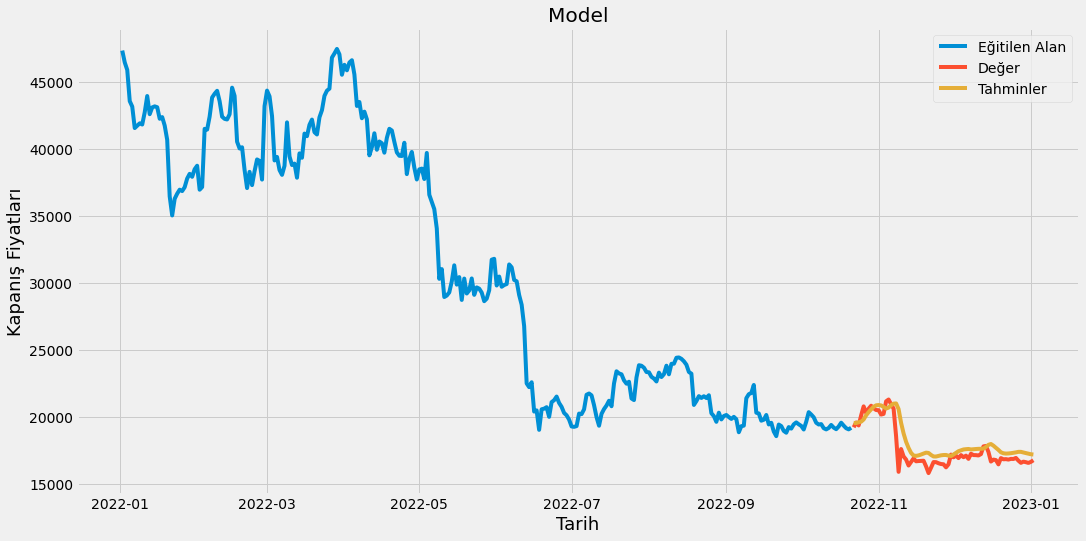

                   Close     Tahminler
Date                                  
2022-10-22  19208.189453  19536.843750
2022-10-23  19567.007813  19522.496094
2022-10-24  19345.572266  19583.816406
2022-10-25  20095.857422  19628.052734
2022-10-26  20770.441406  19793.265625
...                  ...           ...
2022-12-29  16642.341797  17327.089844
2022-12-30  16602.585938  17281.832031
2022-12-31  16547.496094  17238.824219
2023-01-01  16625.080078  17195.126953
2023-01-02  16745.986328  17172.925781

[73 rows x 2 columns]


In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)